In [1]:
import pandas as pd
import numpy as np
from ast import literal_eval

In [2]:
data=pd.read_csv('Data_after_EDA.csv')


## Bining to 4 bins

In [3]:
y=pd.qcut(data['popularity'], q=4,labels=['awful','bad','good','fantastic'])
X=data[['speechiness','energy','danceability','acousticness','liveness','mode','valence','instrumentalness','tempo','loudness','key']]
X['tempo']=(X['tempo'])/max(X['tempo'])
X['loudness']=(X['loudness']+60)/max(X['loudness']+60)
X['key']=(X['key'])/max(X['key'])
display(X)
display(y)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

speechiness  energy  danceability  acousticness  liveness  mode  \
0           0.4510  0.4450         0.645       0.67400    0.1510     1   
1           0.9570  0.2630         0.695       0.79700    0.1480     1   
2           0.0512  0.1770         0.434       0.99400    0.2120     1   
3           0.0504  0.0946         0.321       0.99500    0.1040     1   
4           0.0390  0.1580         0.402       0.98900    0.3110     0   
...            ...     ...           ...           ...       ...   ...   
93130       0.3230  0.8290         0.746       0.10500    0.1450     0   
93131       0.2170  0.5970         0.720       0.17100    0.1700     1   
93132       0.0549  0.8740         0.714       0.12800    0.1050     1   
93133       0.0907  0.7460         0.791       0.00938    0.1250     1   
93134       0.1830  0.8340         0.808       0.28100    0.0321     0   

       valence  instrumentalness     tempo  loudness       key  
0        0.127          0.744000  0.430826  0.730749  0.000000  
1        0.655          0.000000  0.419148  0.592968  0.000000  
2        0.457          0.021800  0.535879  0.607940  0.090909  
3        0.397          0.918000  0.698437  0.501746  0.636364  
4        0.196          0.130000  0.424124  0.674967  0.272727  
...        ...               ...       ...       ...       ...  
93130    0.681          0.000000  0.382156  0.859385  0.636364  
93131    0.367          0.000000  0.616907  0.837820  0.090909  
93132    0.648          0.000146  0.398559  0.883627  0.545455  
93133    0.903          0.000125  0.682059  0.865774  0.545455  
93134    0.761          0.000000  0.632571  0.890439  0.545455  

[93135 rows x 11 columns]

0              bad
1            awful
2            awful
3            awful
4            awful
           ...    
93130    fantastic
93131    fantastic
93132        awful
93133          bad
93134          bad
Name: popularity, Length: 93135, dtype: category
Categories (4, object): ['awful' < 'bad' < 'good' < 'fantastic']

In [4]:
X.to_csv('Data_manually_normalize_X.csv')
y.to_csv('Data_manually_normalize_y.csv')

## Using PCA

In [5]:
data_for_pca=data[['duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','release_date_year']]
data_for_pca

duration_ms  explicit  danceability  energy  key  loudness  mode  \
0           126903         0         0.645  0.4450    0   -13.338     1   
1            98200         0         0.695  0.2630    0   -22.136     1   
2           181640         0         0.434  0.1770    1   -21.180     1   
3           176907         0         0.321  0.0946    7   -27.961     1   
4           163080         0         0.402  0.1580    3   -16.900     0   
...            ...       ...           ...     ...  ...       ...   ...   
93130       187097         1         0.746  0.8290    7    -5.124     0   
93131       185992         1         0.720  0.5970    1    -6.501     1   
93132       214293         0         0.714  0.8740    6    -3.576     1   
93133       183160         0         0.791  0.7460    6    -4.716     1   
93134       167253         0         0.808  0.8340    6    -3.141     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
0           0.4510       0.67400          0.744000    0.1510    0.127   
1           0.9570       0.79700          0.000000    0.1480    0.655   
2           0.0512       0.99400          0.021800    0.2120    0.457   
3           0.0504       0.99500          0.918000    0.1040    0.397   
4           0.0390       0.98900          0.130000    0.3110    0.196   
...            ...           ...               ...       ...      ...   
93130       0.3230       0.10500          0.000000    0.1450    0.681   
93131       0.2170       0.17100          0.000000    0.1700    0.367   
93132       0.0549       0.12800          0.000146    0.1050    0.648   
93133       0.0907       0.00938          0.000125    0.1250    0.903   
93134       0.1830       0.28100          0.000000    0.0321    0.761   

         tempo  time_signature  release_date_year  
0      104.851               3               1922  
1      102.009               1               1922  
2      130.418               5               1922  
3      169.980               3               1922  
4      103.220               4               1922  
...        ...             ...                ...  
93130   93.006               4               2021  
93131  150.138               4               2021  
93132   96.998               4               2021  
93133  165.994               4               2021  
93134  153.950               4               2021  

[93135 rows x 15 columns]

In [6]:
from sklearn.preprocessing import StandardScaler
normalaizer = StandardScaler().fit(data_for_pca)
noralized = normalaizer.transform(data_for_pca[data_for_pca.columns])
df = pd.DataFrame(data=noralized,columns=data_for_pca.columns)
df

duration_ms  explicit  danceability    energy       key  loudness  \
0        -0.721477 -0.243523      0.597615 -0.114116 -1.482713 -0.283681   
1        -0.925045 -0.243523      0.887415 -0.785135 -1.482713 -1.845603   
2        -0.333268 -0.243523     -0.625342 -1.102211 -1.197420 -1.675883   
3        -0.366836 -0.243523     -1.280291 -1.406013  0.514340 -2.879724   
4        -0.464900 -0.243523     -0.810814 -1.172262 -0.626833 -0.916048   
...            ...       ...           ...       ...       ...       ...   
93130    -0.294566  4.106396      1.183011  1.301661  0.514340  1.174563   
93131    -0.302403  4.106396      1.032315  0.446296 -1.197420  0.930102   
93132    -0.101685 -0.243523      0.997539  1.467573  0.229046  1.449381   
93133    -0.322488 -0.243523      1.443832  0.995647  0.229046  1.246995   
93134    -0.435305 -0.243523      1.542364  1.320096  0.229046  1.526608   

           mode  speechiness  acousticness  instrumentalness  liveness  \
0      0.647356     1.862545      0.404060          1.666124 -0.325345   
1      0.647356     4.601482      0.725962         -0.579825 -0.342595   
2      0.647356    -0.301539      1.241529         -0.514016  0.025411   
3      0.647356    -0.305870      1.244146          2.191386 -0.595600   
4     -1.544744    -0.367577      1.228443         -0.187388  0.594672   
...         ...          ...           ...               ...       ...   
93130 -1.544744     1.169692     -1.085064         -0.579825 -0.359846   
93131  0.647356     0.595922     -0.912336         -0.579825 -0.216093   
93132  0.647356    -0.281512     -1.024871         -0.579384 -0.589850   
93133  0.647356    -0.087729     -1.335310         -0.579448 -0.474848   
93134 -1.544744     0.411883     -0.624456         -0.579825 -1.009033   

        valence     tempo  time_signature  release_date_year  
0     -1.573479 -0.395126       -1.667656          -1.835700  
1      0.448902 -0.489058       -5.576726          -1.835700  
2     -0.309491  0.449907        2.241414          -1.835700  
3     -0.539307  1.757497       -1.667656          -1.835700  
4     -1.309191 -0.449033        0.286879          -1.835700  
...         ...       ...             ...                ...  
93130  0.548489 -0.786623        0.286879           1.681056  
93131 -0.654215  1.101686        0.286879           1.681056  
93132  0.422090 -0.654680        0.286879           1.681056  
93133  1.398808  1.625753        0.286879           1.681056  
93134  0.854910  1.227679        0.286879           1.681056  

[93135 rows x 15 columns]

In [7]:
from sklearn.decomposition import PCA
number_component=11
coulmns=[]
for i in range(number_component):
    coulmns.append('PCA '+str(i))

coulmns

['PCA 0',
 'PCA 1',
 'PCA 2',
 'PCA 3',
 'PCA 4',
 'PCA 5',
 'PCA 6',
 'PCA 7',
 'PCA 8',
 'PCA 9',
 'PCA 10']

In [8]:
pca = PCA(n_components=number_component)

pca.fit(df)
X1 = pca.transform(df)
X=pd.DataFrame(X1,
                   columns=coulmns)

In [9]:
X.to_csv('Data_PCA_normalize_X.csv')
y.to_csv('Data_PCA_normalize_y.csv')

## Data with artis popularity with number of followers

In [10]:
artist=pd.read_csv("Datasets/artists.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3147: DtypeWarning: Columns (2,4,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
artist

mbid              artist_mb  \
0        cc197bad-dc9c-440d-a5b5-d52ba2e14234               Coldplay   
1        a74b1b7f-71a5-4011-9441-d0b5e4122711              Radiohead   
2        8bfac288-ccc5-448d-9573-c33ea2aa5c30  Red Hot Chili Peppers   
3        73e5e69d-3554-40d8-8516-00cb38737a1c                Rihanna   
4        b95ce3ff-3d05-4e87-9e01-c97b66af13d4                 Eminem   
...                                       ...                    ...   
1466078  1eab523e-98ff-4083-aa34-8922740bc696                    정은지   
1466079  a18f0527-907e-42b0-8268-504966274581                    남태현   
1466080  20a57e37-24b5-4301-855b-35076580fb88                    헤일로   
1466081  83891a4d-1bf4-4abe-a483-5b3d9d614efa                    서현진   
1466082  3d05dd13-f524-4e80-91aa-24094e8b5928                    김희철   

                 artist_lastfm      country_mb           country_lastfm  \
0                     Coldplay  United Kingdom           United Kingdom   
1                    Radiohead  United Kingdom           United Kingdom   
2        Red Hot Chili Peppers   United States            United States   
3                      Rihanna   United States  Barbados; United States   
4                       Eminem   United States            United States   
...                        ...             ...                      ...   
1466078                    NaN     South Korea              South Korea   
1466079                    NaN     South Korea                      NaN   
1466080                    NaN     South Korea                      NaN   
1466081                    NaN     South Korea              South Korea   
1466082                    NaN     South Korea              South Korea   

                                                   tags_mb  \
0        rock; pop; alternative rock; british; uk; brit...   
1        rock; electronic; alternative rock; british; g...   
2        rock; alternative rock; 80s; 90s; rap; metal; ...   
3        pop; dance; hip hop; reggae; contemporary r b;...   
4        turkish; rap; american; hip-hop; hip hop; hiph...   
...                                                    ...   
1466078                                                NaN   
1466079                                                NaN   
1466080                                                NaN   
1466081                                                NaN   
1466082                                                NaN   

                                               tags_lastfm  listeners_lastfm  \
0        rock; alternative; britpop; alternative rock; ...         5381567.0   
1        alternative; alternative rock; rock; indie; el...         4732528.0   
2        rock; alternative rock; alternative; Funk Rock...         4620835.0   
3        pop; rnb; female vocalists; dance; Hip-Hop; Ri...         4558193.0   
4        rap; Hip-Hop; Eminem; hip hop; pop; american; ...         4517997.0   
...                                                    ...               ...   
1466078                                                NaN               NaN   
1466079                                                NaN               NaN   
1466080                                                NaN               NaN   
1466081                                                NaN               NaN   
1466082                                                NaN               NaN   

         scrobbles_lastfm  ambiguous_artist  
0             360111850.0             False  
1             499548797.0             False  
2             293784041.0             False  
3             199248986.0             False  
4             199507511.0             False  
...                   ...               ...  
1466078               NaN             False  
1466079               NaN             False  
1466080               NaN             False  
1466081               NaN             False  
1466082               NaN             False  

[1466083 rows x 

In [12]:
important_artist=artist[['artist_mb','artist_lastfm','country_mb','listeners_lastfm','scrobbles_lastfm']].dropna()
important_artist=important_artist.replace( 0.0,np.nan).dropna()

In [13]:
tops10000=important_artist[important_artist.listeners_lastfm>=101398]
tops10000

artist_mb            artist_lastfm      country_mb  \
0                     Coldplay                 Coldplay  United Kingdom   
1                    Radiohead                Radiohead  United Kingdom   
2        Red Hot Chili Peppers    Red Hot Chili Peppers   United States   
3                      Rihanna                  Rihanna   United States   
4                       Eminem                   Eminem   United States   
...                        ...                      ...             ...   
10760  Circle Takes the Square  Circle Takes the Square   United States   
10761            Saint Raymond            Saint Raymond  United Kingdom   
10762        Man or Astro‐Man?        Man or Astro-Man?   United States   
10763                   No-Man                   No-Man  United Kingdom   
10764                    Laika                    Laika  United Kingdom   

       listeners_lastfm  scrobbles_lastfm  
0             5381567.0       360111850.0  
1             4732528.0       499548797.0  
2             4620835.0       293784041.0  
3             4558193.0       199248986.0  
4             4517997.0       199507511.0  
...                 ...               ...  
10760          101427.0         3075989.0  
10761          101415.0          811762.0  
10762          101409.0         2704776.0  
10763          101407.0         2520831.0  
10764          101399.0         1389815.0  

[10000 rows x 5 columns]

In [14]:
bin,bin1=pd.qcut(tops10000['listeners_lastfm'], q=8,retbins=True)
tops10000['topclass'] = pd.cut(tops10000['listeners_lastfm'], bins=bin1, labels=['H','G','F','E','D','C','B','A'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Adding country to tracks

In [15]:
data['artist_class']='I'
data['artist_country']='search me'
for i in range(len(data)):
    artist_name =data['artists'][i]
    res = artist_name.strip('][').translate({ ord("\'"): None }).split(', ')
    artist_n=res[0]
    selected=tops10000[tops10000['artist_lastfm'].str.find(artist_n)==0]
    if len(selected)>0:
        data['artist_class'].iloc[i]=selected['topclass'].values[0]
        data['artist_country'].iloc[i]=selected['country_mb'].values[0]



/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

KeyboardInterrupt: 

<AxesSubplot:>

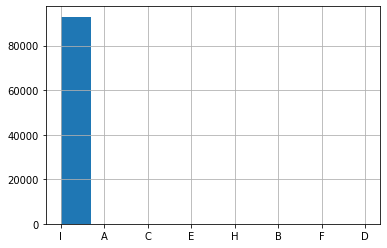

In [16]:
display(data['artist_class'].hist())


In [ ]:
display(data['artist_country'].hist())

In [46]:
data['artist_country short']=''
for i in range(len(data['artist_country'])):
    if len(data['artist_country'][i].split(' '))>1:
        data['artist_country short'].iloc[i]=data['artist_country'][i].split(' ')[0][0]+data['artist_country'][i].split(' ')[1][0]
    else:
         data['artist_country short'].iloc[i]=data['artist_country'][i]

In [51]:
display(data['artist_country'].value_counts())

search me                 41554
United States             31985
United Kingdom             8415
Germany                    1915
Canada                     1372
                          ...  
Barbados                      2
Bermuda                       2
British Virgin Islands        2
Bahamas                       1
Algeria                       1
Name: artist_country, Length: 63, dtype: int64

In [73]:

data['artist_country'].unique()

array(['search me', 'United States', 'Germany', 'Italy', 'Jamaica',
       'France', 'Poland', 'Austria', 'Russia', 'United Kingdom',
       'Hungary', 'Czech Republic', 'Norway', 'Argentina', 'Netherlands',
       'Brazil', 'Finland', 'India', 'Switzerland', 'Spain', 'Cuba',
       'Peru', 'Canada', 'Mexico', 'South Africa', 'Monaco', 'Sweden',
       'Ireland', 'Belgium', 'Japan', 'Australia', 'Estonia', 'Ethiopia',
       'Panama', 'Malaysia', 'Nigeria', 'Greece', 'Latvia', 'New Zealand',
       'Senegal', 'Colombia', 'Denmark', 'Venezuela', 'Iceland', 'Turkey',
       'Philippines', 'Guatemala', 'Jersey', 'Mali', 'Chile', 'Algeria',
       'Bermuda', 'Romania', 'Bahamas', 'South Korea', 'Moldova',
       'Saint Vincent and The Grenadines', 'Lithuania', 'Egypt',
       'Barbados', 'British Virgin Islands', 'China', 'Israel'],
      dtype=object)

In [80]:
continent=['sm','North america','Europe','Europe','south america','Europe','Europe','Asia','Asia','Europe','Europe','Europe','Europe','south america','Europe','south america','Europe','Asia','Europe','Europe','south america','south america','North america','south america','Africa','Europe','Europe','Europe','Europe','Asia','Asia','Europe','Africa','south america','Asia','Africa','Europe','Europe','Asia','Asia','south america','Europe','Asia','Europe','Europe','Asia','south america','Europe','Africa','south america','Africa','North america','Europe','North america','Asia','Europe','south america','Europe','Africa','south america','south america','Asia','Asia']

In [81]:
dic={}

In [82]:
for i in range(len(data['artist_country'].unique())):
    dic[data['artist_country'].unique()[i]]=continent[i]

In [84]:
dic

{'search me': 'sm',
 'United States': 'North america',
 'Germany': 'Europe',
 'Italy': 'Europe',
 'Jamaica': 'south america',
 'France': 'Europe',
 'Poland': 'Europe',
 'Austria': 'Asia',
 'Russia': 'Asia',
 'United Kingdom': 'Europe',
 'Hungary': 'Europe',
 'Czech Republic': 'Europe',
 'Norway': 'Europe',
 'Argentina': 'south america',
 'Netherlands': 'Europe',
 'Brazil': 'south america',
 'Finland': 'Europe',
 'India': 'Asia',
 'Switzerland': 'Europe',
 'Spain': 'Europe',
 'Cuba': 'south america',
 'Peru': 'south america',
 'Canada': 'North america',
 'Mexico': 'south america',
 'South Africa': 'Africa',
 'Monaco': 'Europe',
 'Sweden': 'Europe',
 'Ireland': 'Europe',
 'Belgium': 'Europe',
 'Japan': 'Asia',
 'Australia': 'Asia',
 'Estonia': 'Europe',
 'Ethiopia': 'Africa',
 'Panama': 'south america',
 'Malaysia': 'Asia',
 'Nigeria': 'Africa',
 'Greece': 'Europe',
 'Latvia': 'Europe',
 'New Zealand': 'Asia',
 'Senegal': 'Asia',
 'Colombia': 'south america',
 'Denmark': 'Europe',
 'Vene

In [89]:
data['artist_continent']=data['artist_country'].map(dic)

<AxesSubplot:>

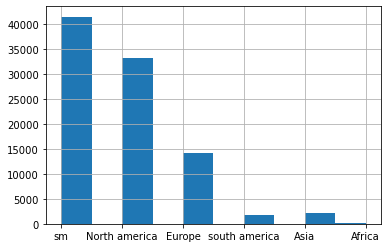

In [90]:
data['artist_continent'].hist()

In [91]:
data

Unnamed: 0                      id  \
0               0  35iwgR4jXetI318WEWsa1Q   
1               1  021ht4sdgPcrDgSk7JTbKY   
2               2  07A5yehtSnoedViJAZkNnc   
3               3  08FmqUhxtyLTn6pAh6bk45   
4               4  08y9GfoqCWfOGsKdwojr5e   
...           ...                     ...   
93130       93130  49lrrlWBTkVEIuHkjnf7tI   
93131       93131  1rICTKr67UUnoDVvOj4A8c   
93132       93132  2ZehPPTmn6QxlI1KedHo51   
93133       93133  3AmUf8oWdnPwVQcVugz6R5   
93134       93134  3O2JLGDWDMqtVqPnzYleEu   

                                      name  popularity  duration_ms  explicit  \
0                                    Carve           6       126903         0   
1      Capítulo 2.16 - Banquero Anarquista           0        98200         0   
2       Vivo para Quererte - Remasterizado           0       181640         0   
3            El Prisionero - Remasterizado           0       176907         0   
4                      Lady of the Evening           0       163080         0   
...                                    ...         ...          ...       ...   
93130                      Easter In Miami          64       187097         1   
93131      Thugged Out (feat. Kodak Black)          71       185992         1   
93132                               Créeme           2       214293         0   
93133                              Punto G           4       183160         0   
93134                     La Vida Continuó           3       167253         0   

                               artists  \
0                              ['Uli']   
1                  ['Fernando Pessoa']   
2                  ['Ignacio Corsini']   
3                  ['Ignacio Corsini']   
4                      ['Dick Haymes']   
...                                ...   
93130                  ['Kodak Black']   
93131     ['YNW Melly', 'Kodak Black']   
93132            ['KAROL G', 'Maluma']   
93133                      ['KAROL G']   
93134  ['KAROL G', 'Simone & Simaria']   

                                              id_artists release_date  \
0                             ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                             ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                             ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                             ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                             ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                  ...          ...   
93130                         ['46SHBwWsqBkxI7EeeBEQG7']   2021-04-04   
93131  ['1cNDP5yjU5vjeR8qMf4grg', '46SHBwWsqBkxI7EeeB...   2021-03-05   
93132  ['790FomKkXshlbRYZFtlgla', '1r4hJ1h58CWwUQe3Mx...   2021-04-09   
93133                         ['790FomKkXshlbRYZFtlgla']   2021-04-02   
93134  ['790FomKkXshlbRYZFtlgla', '0MInKJqZscEeNc5K3K...   2021-04-09   

       danceability  ...  time_signature  year  release_date_year  decade  \
0             0.645  ...               3  1922               1922    1920   
1             0.695  ...               1  1922               1922    1920   
2             0.434  ...               5  1922               1922    1920   
3             0.321  ...               3  1922               1922    1920   
4             0.402  ...               4  1922               1922    1920   
...             ...  ...             ...   ...                ...     ...   
93130         0.746  ...               4  2021               2021    2020   
93131         0.720  ...               4  2021               2021    2020   
93132         0.714  ...               4  2021               2021    2020   
93133         0.791  ...               4  2021               2021    2020   
93134         0.808  ...               4  2021               2021    2020   

                   duration3  popularity4  artist_class  artist_country  \
0                 under 2:59        awful             I       search me   
1                 under 2:59        

In [17]:
# data = pd.read_csv('Data_Artist_extact.csv')

## Adding popularity from new Dataset

In [18]:
new_artists_db = pd.read_csv('Datasets/artistsById.csv')

In [19]:
new_artists_db.index = new_artists_db["id"]
new_artists_db_dict = new_artists_db.to_dict(orient='index')
new_artists_db_dict

{'0DheY5irMjBUeLybbCUEZ2': {'id': '0DheY5irMjBUeLybbCUEZ2',
  'followers': 0.0,
  'genres': '[]',
  'name': 'Armid & Amir Zare Pashai feat. Sara Rouzbehani',
  'popularity': 0},
 '0DlhY15l3wsrnlfGio2bjU': {'id': '0DlhY15l3wsrnlfGio2bjU',
  'followers': 5.0,
  'genres': '[]',
  'name': 'ปูนา ภาวิณี',
  'popularity': 0},
 '0DmRESX2JknGPQyO15yxg7': {'id': '0DmRESX2JknGPQyO15yxg7',
  'followers': 0.0,
  'genres': '[]',
  'name': 'Sadaa',
  'popularity': 0},
 '0DmhnbHjm1qw6NCYPeZNgJ': {'id': '0DmhnbHjm1qw6NCYPeZNgJ',
  'followers': 0.0,
  'genres': '[]',
  'name': "Tra'gruda",
  'popularity': 0},
 '0Dn11fWM7vHQ3rinvWEl4E': {'id': '0Dn11fWM7vHQ3rinvWEl4E',
  'followers': 2.0,
  'genres': '[]',
  'name': 'Ioannis Panoutsopoulos',
  'popularity': 0},
 '0DotfDlYMGqkbzfBhcA5r6': {'id': '0DotfDlYMGqkbzfBhcA5r6',
  'followers': 7.0,
  'genres': '[]',
  'name': 'Astral Affect',
  'popularity': 0},
 '0DqP3bOCiC48L8SM9gK4W8': {'id': '0DqP3bOCiC48L8SM9gK4W8',
  'followers': 1.0,
  'genres': '[]',
  'n

In [20]:
# itr = 0
def popularity(x):
#     global itr
#     itr+=1
#     if not itr%1000:
#         print(itr)
    total = 0
    number = 0
    for i in literal_eval(x["id_artists"]):
        
        try:
            total += new_artists_db_dict[i]["popularity"]
            number += 1
        except:
            pass
            
    
    if number:
        return total/number
    return 0
    

data["artist_popularity"] = data.apply(lambda x: popularity(x)  ,axis=1)

In [38]:
data.head()

Unnamed: 0  Unnamed: 0.1                      id  \
0           0             0  35iwgR4jXetI318WEWsa1Q   
1           1             1  021ht4sdgPcrDgSk7JTbKY   
2           2             2  07A5yehtSnoedViJAZkNnc   
3           3             3  08FmqUhxtyLTn6pAh6bk45   
4           4             4  08y9GfoqCWfOGsKdwojr5e   

                                  name  popularity  duration_ms  explicit  \
0                                Carve           6       126903         0   
1  Capítulo 2.16 - Banquero Anarquista           0        98200         0   
2   Vivo para Quererte - Remasterizado           0       181640         0   
3        El Prisionero - Remasterizado           0       176907         0   
4                  Lady of the Evening           0       163080         0   

               artists                  id_artists release_date  ...  year  \
0              ['Uli']  ['45tIt06XoI0Iio4LBEVpls']   1922-02-22  ...  1922   
1  ['Fernando Pessoa']  ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01  ...  1922   
2  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21  ...  1922   
3  ['Ignacio Corsini']  ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21  ...  1922   
4      ['Dick Haymes']  ['3BiJGZsyX9sJchTqcSA7Su']         1922  ...  1922   

   release_date_year  decade              duration3  popularity4  \
0               1922    1920             under 2:59        awful   
1               1922    1920             under 2:59        awful   
2               1922    1920  betwwen 2:59 and 3:59        awful   
3               1922    1920             under 2:59        awful   
4               1922    1920             under 2:59        awful   

   artist_class  artist_country  artist_country short  artist_continent  \
0             I       search me                    sm                sm   
1             I       search me                    sm                sm   
2             I       search me                    sm                sm   
3             I       search me                    sm                sm   
4             I       search me                    sm                sm   

   artist_popularity  
0                4.0  
1                0.0  
2               23.0  
3               23.0  
4               35.0  

[5 rows x 32 columns]

In [21]:
data.to_csv('Data_Artist_extact.csv')

In [24]:
Data_Artist_extact=pd.read_csv('Data_Artist_extact.csv').drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1'])
Data_Artist_extact

id                                 name  \
0      35iwgR4jXetI318WEWsa1Q                                Carve   
1      021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2      07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3      08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4      08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                       ...                                  ...   
93130  49lrrlWBTkVEIuHkjnf7tI                      Easter In Miami   
93131  1rICTKr67UUnoDVvOj4A8c      Thugged Out (feat. Kodak Black)   
93132  2ZehPPTmn6QxlI1KedHo51                               Créeme   
93133  3AmUf8oWdnPwVQcVugz6R5                              Punto G   
93134  3O2JLGDWDMqtVqPnzYleEu                     La Vida Continuó   

       popularity  duration_ms  explicit                          artists  \
0               6       126903         0                          ['Uli']   
1               0        98200         0              ['Fernando Pessoa']   
2               0       181640         0              ['Ignacio Corsini']   
3               0       176907         0              ['Ignacio Corsini']   
4               0       163080         0                  ['Dick Haymes']   
...           ...          ...       ...                              ...   
93130          64       187097         1                  ['Kodak Black']   
93131          71       185992         1     ['YNW Melly', 'Kodak Black']   
93132           2       214293         0            ['KAROL G', 'Maluma']   
93133           4       183160         0                      ['KAROL G']   
93134           3       167253         0  ['KAROL G', 'Simone & Simaria']   

                                              id_artists release_date  \
0                             ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                             ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                             ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                             ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                             ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                  ...          ...   
93130                         ['46SHBwWsqBkxI7EeeBEQG7']   2021-04-04   
93131  ['1cNDP5yjU5vjeR8qMf4grg', '46SHBwWsqBkxI7EeeB...   2021-03-05   
93132  ['790FomKkXshlbRYZFtlgla', '1r4hJ1h58CWwUQe3Mx...   2021-04-09   
93133                         ['790FomKkXshlbRYZFtlgla']   2021-04-02   
93134  ['790FomKkXshlbRYZFtlgla', '0MInKJqZscEeNc5K3K...   2021-04-09   

       danceability  energy  ...  year  release_date_year  decade  \
0             0.645  0.4450  ...  1922               1922    1920   
1             0.695  0.2630  ...  1922               1922    1920   
2             0.434  0.1770  ...  1922               1922    1920   
3             0.321  0.0946  ...  1922               1922    1920   
4             0.402  0.1580  ...  1922               1922    1920   
...             ...     ...  ...   ...                ...     ...   
93130         0.746  0.8290  ...  2021               2021    2020   
93131         0.720  0.5970  ...  2021               2021    2020   
93132         0.714  0.8740  ...  2021               2021    2020   
93133         0.791  0.7460  ...  2021               2021    2020   
93134         0.808  0.8340  ...  2021               2021    2020   

                   duration3  popularity4  artist_class  artist_country  \
0                 under 2:59        awful             I       search me   
1                 under 2:59        awful             I       search me   
2      betwwen 2:59 and 3:59        awful             I       search me   
3                 under 2:59        awful             I       search me   
4                 under 2:59        awful             I       search me   
...                      ...          ...           ...             ...   
93130  betwwen 2:59 and 3:59  

## Add dummy data for column 'artist_class','artist_continent'

In [25]:
Data_Artist_extact_encoded=pd.get_dummies(Data_Artist_extact,columns=['artist_class','artist_continent'])
Data_Artist_extact_encoded

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


id                                 name  \
0      35iwgR4jXetI318WEWsa1Q                                Carve   
1      021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2      07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3      08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4      08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                       ...                                  ...   
93130  49lrrlWBTkVEIuHkjnf7tI                      Easter In Miami   
93131  1rICTKr67UUnoDVvOj4A8c      Thugged Out (feat. Kodak Black)   
93132  2ZehPPTmn6QxlI1KedHo51                               Créeme   
93133  3AmUf8oWdnPwVQcVugz6R5                              Punto G   
93134  3O2JLGDWDMqtVqPnzYleEu                     La Vida Continuó   

       popularity  duration_ms  explicit                          artists  \
0               6       126903         0                          ['Uli']   
1               0        98200         0              ['Fernando Pessoa']   
2               0       181640         0              ['Ignacio Corsini']   
3               0       176907         0              ['Ignacio Corsini']   
4               0       163080         0                  ['Dick Haymes']   
...           ...          ...       ...                              ...   
93130          64       187097         1                  ['Kodak Black']   
93131          71       185992         1     ['YNW Melly', 'Kodak Black']   
93132           2       214293         0            ['KAROL G', 'Maluma']   
93133           4       183160         0                      ['KAROL G']   
93134           3       167253         0  ['KAROL G', 'Simone & Simaria']   

                                              id_artists release_date  \
0                             ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                             ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                             ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                             ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                             ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                  ...          ...   
93130                         ['46SHBwWsqBkxI7EeeBEQG7']   2021-04-04   
93131  ['1cNDP5yjU5vjeR8qMf4grg', '46SHBwWsqBkxI7EeeB...   2021-03-05   
93132  ['790FomKkXshlbRYZFtlgla', '1r4hJ1h58CWwUQe3Mx...   2021-04-09   
93133                         ['790FomKkXshlbRYZFtlgla']   2021-04-02   
93134  ['790FomKkXshlbRYZFtlgla', '0MInKJqZscEeNc5K3K...   2021-04-09   

       danceability  energy  ...  artist_class_F  artist_class_G  \
0             0.645  0.4450  ...               0               0   
1             0.695  0.2630  ...               0               0   
2             0.434  0.1770  ...               0               0   
3             0.321  0.0946  ...               0               0   
4             0.402  0.1580  ...               0               0   
...             ...     ...  ...             ...             ...   
93130         0.746  0.8290  ...               0               0   
93131         0.720  0.5970  ...               0               0   
93132         0.714  0.8740  ...               0               0   
93133         0.791  0.7460  ...               0               0   
93134         0.808  0.8340  ...               0               0   

       artist_class_H  artist_class_I  artist_continent_Africa  \
0                   0               1                        0   
1                   0               1                        0   
2                   0               1                        0   
3                   0               1                        0   
4                   0               1                        0   
...               ...             ...                      ...   
93130               0               0                        0   
93131               0               1  

In [26]:
Data_Artist_extact_encoded.columns[-15:]

Index(['artist_class_A', 'artist_class_B', 'artist_class_C', 'artist_class_D',
       'artist_class_E', 'artist_class_F', 'artist_class_G', 'artist_class_H',
       'artist_class_I', 'artist_continent_Africa', 'artist_continent_Asia',
       'artist_continent_Europe', 'artist_continent_North america',
       'artist_continent_sm', 'artist_continent_south america'],
      dtype='object')

## Using PCA for our new Data

In [27]:
columns_for_pca=['duration_ms','explicit','danceability','energy','key','loudness','mode','speechiness','acousticness','instrumentalness','liveness','valence','tempo','time_signature','release_date_year','artist_popularity']+list(Data_Artist_extact_encoded.columns[-15:])
columns_for_pca

['duration_ms',
 'explicit',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature',
 'release_date_year',
 'artist_popularity',
 'artist_class_A',
 'artist_class_B',
 'artist_class_C',
 'artist_class_D',
 'artist_class_E',
 'artist_class_F',
 'artist_class_G',
 'artist_class_H',
 'artist_class_I',
 'artist_continent_Africa',
 'artist_continent_Asia',
 'artist_continent_Europe',
 'artist_continent_North america',
 'artist_continent_sm',
 'artist_continent_south america']

In [28]:
data_for_pca_Artist=Data_Artist_extact_encoded[columns_for_pca]
data_for_pca_Artist


duration_ms  explicit  danceability  energy  key  loudness  mode  \
0           126903         0         0.645  0.4450    0   -13.338     1   
1            98200         0         0.695  0.2630    0   -22.136     1   
2           181640         0         0.434  0.1770    1   -21.180     1   
3           176907         0         0.321  0.0946    7   -27.961     1   
4           163080         0         0.402  0.1580    3   -16.900     0   
...            ...       ...           ...     ...  ...       ...   ...   
93130       187097         1         0.746  0.8290    7    -5.124     0   
93131       185992         1         0.720  0.5970    1    -6.501     1   
93132       214293         0         0.714  0.8740    6    -3.576     1   
93133       183160         0         0.791  0.7460    6    -4.716     1   
93134       167253         0         0.808  0.8340    6    -3.141     0   

       speechiness  acousticness  instrumentalness  ...  artist_class_F  \
0           0.4510       0.67400          0.744000  ...               0   
1           0.9570       0.79700          0.000000  ...               0   
2           0.0512       0.99400          0.021800  ...               0   
3           0.0504       0.99500          0.918000  ...               0   
4           0.0390       0.98900          0.130000  ...               0   
...            ...           ...               ...  ...             ...   
93130       0.3230       0.10500          0.000000  ...               0   
93131       0.2170       0.17100          0.000000  ...               0   
93132       0.0549       0.12800          0.000146  ...               0   
93133       0.0907       0.00938          0.000125  ...               0   
93134       0.1830       0.28100          0.000000  ...               0   

       artist_class_G  artist_class_H  artist_class_I  \
0                   0               0               1   
1                   0               0               1   
2                   0               0               1   
3                   0               0               1   
4                   0               0               1   
...               ...             ...             ...   
93130               0               0               0   
93131               0               0               1   
93132               0               0               1   
93133               0               0               1   
93134               0               0               1   

       artist_continent_Africa  artist_continent_Asia  \
0                            0                      0   
1                            0                      0   
2                            0                      0   
3                            0                      0   
4                            0                      0   
...                        ...                    ...   
93130                        0                      0   
93131                        0                      0   
93132                        0                      0   
93133                        0                      0   
93134                        0                      0   

       artist_continent_Europe  artist_continent_North america  \
0                            0                               0   
1                            0                               0   
2                            0                               0   
3                            0                               0   
4                            0                               0   
...                        ...                             ...   
93130                        0                               1   
93131                        0                               0   
93132                        0                               0   
93133                        0                               0   
93134                        0                               0   

       artist_continent_sm  artist_contine

## Normalazing Data

In [29]:
from sklearn.preprocessing import StandardScaler
normalaizer_artist = StandardScaler().fit(data_for_pca_Artist)
noralized_artist = normalaizer_artist.transform(data_for_pca_Artist[data_for_pca_Artist.columns])
df_normalized_artist = pd.DataFrame(data=noralized_artist,columns=data_for_pca_Artist.columns)
df_normalized_artist

duration_ms  explicit  danceability    energy       key  loudness  \
0        -0.721477 -0.243523      0.597615 -0.114116 -1.482713 -0.283681   
1        -0.925045 -0.243523      0.887415 -0.785135 -1.482713 -1.845603   
2        -0.333268 -0.243523     -0.625342 -1.102211 -1.197420 -1.675883   
3        -0.366836 -0.243523     -1.280291 -1.406013  0.514340 -2.879724   
4        -0.464900 -0.243523     -0.810814 -1.172262 -0.626833 -0.916048   
...            ...       ...           ...       ...       ...       ...   
93130    -0.294566  4.106396      1.183011  1.301661  0.514340  1.174563   
93131    -0.302403  4.106396      1.032315  0.446296 -1.197420  0.930102   
93132    -0.101685 -0.243523      0.997539  1.467573  0.229046  1.449381   
93133    -0.322488 -0.243523      1.443832  0.995647  0.229046  1.246995   
93134    -0.435305 -0.243523      1.542364  1.320096  0.229046  1.526608   

           mode  speechiness  acousticness  instrumentalness  ...  \
0      0.647356     1.862545      0.404060          1.666124  ...   
1      0.647356     4.601482      0.725962         -0.579825  ...   
2      0.647356    -0.301539      1.241529         -0.514016  ...   
3      0.647356    -0.305870      1.244146          2.191386  ...   
4     -1.544744    -0.367577      1.228443         -0.187388  ...   
...         ...          ...           ...               ...  ...   
93130 -1.544744     1.169692     -1.085064         -0.579825  ...   
93131  0.647356     0.595922     -0.912336         -0.579825  ...   
93132  0.647356    -0.281512     -1.024871         -0.579384  ...   
93133  0.647356    -0.087729     -1.335310         -0.579448  ...   
93134 -1.544744     0.411883     -0.624456         -0.579825  ...   

       artist_class_F  artist_class_G  artist_class_H  artist_class_I  \
0           -0.141493       -0.127334       -0.125007        1.114137   
1           -0.141493       -0.127334       -0.125007        1.114137   
2           -0.141493       -0.127334       -0.125007        1.114137   
3           -0.141493       -0.127334       -0.125007        1.114137   
4           -0.141493       -0.127334       -0.125007        1.114137   
...               ...             ...             ...             ...   
93130       -0.141493       -0.127334       -0.125007       -0.897556   
93131       -0.141493       -0.127334       -0.125007        1.114137   
93132       -0.141493       -0.127334       -0.125007        1.114137   
93133       -0.141493       -0.127334       -0.125007        1.114137   
93134       -0.141493       -0.127334       -0.125007        1.114137   

       artist_continent_Africa  artist_continent_Asia  \
0                    -0.031445              -0.154196   
1                    -0.031445              -0.154196   
2                    -0.031445              -0.154196   
3                    -0.031445              -0.154196   
4                    -0.031445              -0.154196   
...                        ...                    ...   
93130                -0.031445              -0.154196   
93131                -0.031445              -0.154196   
93132                -0.031445              -0.154196   
93133                -0.031445              -0.154196   
93134                -0.031445              -0.154196   

       artist_continent_Europe  artist_continent_North america  \
0                    -0.424686                       -0.747056   
1                    -0.424686                       -0.747056   
2                    -0.424686                       -0.747056   
3                    -0.424686                       -0.747056   
4                    -0.424686                       -0.747056   
...                        ...                             ...   
93130                -0.424686                        1.338588   
93131                -0.424686                       -0.747056   
93132                -0.424686                       -0.747056   
93133                -0.424686             

## Again fit PCA on our data

In [30]:
from sklearn.decomposition import PCA
number_component=15
coulmns=[]
for i in range(number_component):
    coulmns.append('PCA '+str(i))

coulmns

['PCA 0',
 'PCA 1',
 'PCA 2',
 'PCA 3',
 'PCA 4',
 'PCA 5',
 'PCA 6',
 'PCA 7',
 'PCA 8',
 'PCA 9',
 'PCA 10',
 'PCA 11',
 'PCA 12',
 'PCA 13',
 'PCA 14']

In [31]:
pca = PCA(n_components=number_component)

pca.fit(df_normalized_artist)
numpy_pca = pca.transform(df_normalized_artist)
X_pca_artist=pd.DataFrame(numpy_pca,
                   columns=coulmns)

In [32]:
X_pca_artist

PCA 0     PCA 1     PCA 2     PCA 3     PCA 4     PCA 5     PCA 6  \
0      3.631804 -0.133937 -0.083558 -0.666780  0.067911  0.043837 -0.388980   
1      4.747858 -0.320827 -2.526345 -2.514067 -0.379918  0.904798  0.316749   
2      3.152746  0.305852 -0.375189  0.120360 -0.324083 -1.215659 -0.588401   
3      4.253799  1.787779  0.471313  0.270163 -0.296072 -0.668285 -0.630730   
4      3.158992  0.767728  0.350598 -0.289768  0.312878  0.401528 -0.459999   
...         ...       ...       ...       ...       ...       ...       ...   
93130 -3.482247 -1.990153 -1.504910 -0.977781  2.284527  2.647327 -0.148431   
93131 -0.929800 -3.049107  0.732460 -1.473443  1.363894  0.874141 -0.398346   
93132 -1.044193 -2.916055  0.777129  0.083634 -0.116128 -0.275636 -0.159056   
93133 -1.196762 -3.571910  0.323049  0.312868 -0.576844 -0.986192  0.233140   
93134 -0.907515 -3.545716  0.376755  0.110074 -0.310659  0.234949  0.761104   

          PCA 7     PCA 8     PCA 9    PCA 10    PCA 11    PCA 12    PCA 13  \
0     -0.903311  0.743350 -0.072984 -0.741364  0.119701  0.654841  0.250264   
1     -2.920396  2.093530 -1.353124 -0.064292 -0.014007  1.008566 -0.081743   
2      0.108486 -0.086262  0.536360 -0.770737  0.233549  0.014211  0.156903   
3      0.429604 -0.092558 -0.232800  0.975152 -0.593263 -0.056798  0.047876   
4      0.168940 -0.154066 -0.031340  0.371129 -0.061817 -0.407931 -0.030355   
...         ...       ...       ...       ...       ...       ...       ...   
93130  1.220026 -0.369880 -0.312838 -0.537976  4.791770  0.021648 -0.916982   
93131 -0.784721 -0.018600  1.036549 -1.891444 -0.106439  1.158253  0.628577   
93132  0.169459 -0.579181  0.721072 -0.740439 -0.130842  0.274125  0.066193   
93133  0.107632 -0.287961  0.372431 -0.146586 -0.277469  0.252640 -0.004001   
93134  0.824185 -0.614083  0.385158  0.241100 -0.293909  0.034852 -0.127435   

         PCA 14  
0     -0.944022  
1     -3.221013  
2      1.376557  
3     -1.612191  
4      0.491831  
...         ...  
93130 -1.642964  
93131 -1.495032  
93132 -0.323969  
93133 -0.822735  
93134 -0.962031  

[93135 rows x 15 columns]

In [33]:
X_pca_artist.to_csv('Data_PCA_normalize_artist_X.csv')


## Add popularity column to all countries

In [38]:
import os

In [45]:
files = os.listdir("Datasets/without_artist")
for i in files:
    
    dd = pd.read_csv("Datasets/without_artist/"+i)
    dd["artist_popularity"] = data.apply(lambda x: popularity(x)  ,axis=1)
    dd.to_csv("Datasets/with_artist/with_artist_"+i)
    os.remove("Datasets/without_artist/"+i)
    print(f"{i} done")

MN.csv done
MY.csv done
CR.csv done
AM.csv done
AZ.csv done
BA.csv done
TL.csv done
TZ.csv done
AL.csv done
BW.csv done
MX.csv done
MO.csv done
LK.csv done
LI.csv done
MZ.csv done
BB.csv done
TO.csv done
TN.csv done
AO.csv done
BT.csv done
ML.csv done
MH.csv done
BG.csv done
UY.csv done
VU.csv done
ZA.csv done
ZW.csv done
VC.csv done
BF.csv done
NR.csv done
NE.csv done
NG.csv done
MK.csv done
NP.csv done
BD.csv done
CW.csv done
BS.csv done
UZ.csv done
WS.csv done
TH.csv done
BR.csv done
CV.csv done
BE.csv done
CA.csv done
KM.csv done
IE.csv done
KZ.csv done
FJ.csv done
GN.csv done
GY.csv done
RO.csv done
SK.csv done
PG.csv done
EG.csv done
ID.csv done
IS.csv done
KN.csv done
HU.csv done
GM.csv done
FI.csv done
EE.csv done
PS.csv done
QA.csv done
PE.csv done
SI.csv done
ES.csv done
HT.csv done
JO.csv done
IT.csv done
GH.csv done
PA.csv done
SZ.csv done
SM.csv done
PW.csv done
SL.csv done
FM.csv done
DE.csv done
KH.csv done
EC.csv done
SN.csv done
PT.csv done
HR.csv done
KI.csv done
JM.c